In [62]:
import pandas as pd
pd.set_option('display.max_columns', 35)

south_sudan_violence_data = pd.read_csv("ACLED_south-sudan.csv")
south_sudan_violence_data.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,1954460,728,SSD5333,5333,2018/11/9,2018,1,Violence against civilians,Aluakluak Communal Militia (South Sudan),NaN,4,Civilians (South Sudan),NaN,7,47,Eastern Africa,South Sudan,Lakes,Rumbek East,Alamtoch West,Akot,6.5520,30.0591,2,Radio Tamazuj,Regional,"On November 9th, a local chief and his son wer...",2,1542043972,SSD
1,1954459,728,SSD5332,5332,2018/11/6,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),NaN,3,Civilians (South Sudan),NaN,7,37,Eastern Africa,South Sudan,Western Bahr el Ghazal,Wau,Udici,Wau,7.7177,28.0071,1,Radio Voice of Hope,Subnational,"On November 6th, a group of ""unknown gunmen"" f...",1,1542043972,SSD
2,1899867,728,SSD5330,5330,2018/11/2,2018,1,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,NaN,2,Government of South Sudan (2011-),NaN,1,12,Eastern Africa,South Sudan,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,Radio Miraya; Sudan Tribune,National-Regional,"On November 2nd, two prominent SPLM-IO detaine...",0,1541443581,SSD


### Work to split up the dates

In [63]:
south_sudan_violence_data['Month']=[d.split('/')[1] for d in south_sudan_violence_data.event_date]
south_sudan_violence_data['Day']=[d.split('/')[2] for d in south_sudan_violence_data.event_date]
south_sudan_violence_data.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,Month,Day
0,1954460,728,SSD5333,5333,2018/11/9,2018,1,Violence against civilians,Aluakluak Communal Militia (South Sudan),NaN,4,Civilians (South Sudan),NaN,7,47,Eastern Africa,South Sudan,Lakes,Rumbek East,Alamtoch West,Akot,6.5520,30.0591,2,Radio Tamazuj,Regional,"On November 9th, a local chief and his son wer...",2,1542043972,SSD,11,9
1,1954459,728,SSD5332,5332,2018/11/6,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),NaN,3,Civilians (South Sudan),NaN,7,37,Eastern Africa,South Sudan,Western Bahr el Ghazal,Wau,Udici,Wau,7.7177,28.0071,1,Radio Voice of Hope,Subnational,"On November 6th, a group of ""unknown gunmen"" f...",1,1542043972,SSD,11,6
2,1899867,728,SSD5330,5330,2018/11/2,2018,1,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,NaN,2,Government of South Sudan (2011-),NaN,1,12,Eastern Africa,South Sudan,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,Radio Miraya; Sudan Tribune,National-Regional,"On November 2nd, two prominent SPLM-IO detaine...",0,1541443581,SSD,11,2


#### Time Precision: <br> 
‘1’ is chosen as the precision level. If sources note a week, <br>
‘2’ is noted in the precision field and the first date of that week is used as the reference date. <br>
If sources note only that an activity took place within a particular month, without reference to the particular date, the month mid-point is chosen unless the beginning or end of month is noted (in which case, the first and last date are used, respectively) and ‘3’ as the precision level. 

In [64]:
south_sudan_violence_data.time_precision.value_counts()

1    4176
2     842
3     241
Name: time_precision, dtype: int64

In [65]:
sudan_event_type = south_sudan_violence_data.event_type.value_counts().rename_axis('type').reset_index(name='counts')

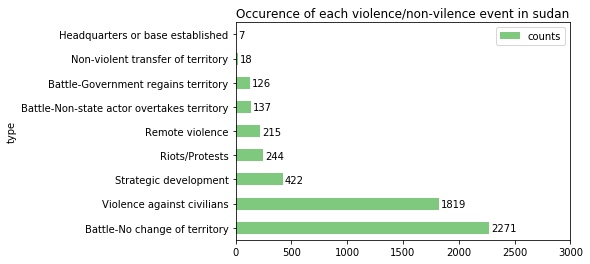

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

sudan_event_type.set_index("type", inplace=True, drop=True)

sudan_event_type.plot.barh(
    title = "Occurence of each violence/non-vilence event in sudan",
    xlim = (0,3000),
    colormap = plt.cm.Accent
)

for i, label in enumerate(list(sudan_event_type.index)):
    score = sudan_event_type.loc[label, "counts"]
    label = sudan_event_type.loc[label, "counts"]
    plt.annotate(str(label), (score + 20, i - 0.15))

plt.show()


#### Actors
All actors fall into 1 of 8 categories: <br>
Government or mutinous force = 1 <br>
Rebel force = 2<br>
Political militia = 3<br>
Ethnic militia = 4<br>
Rioters = 5<br>
Protesters = 6<br>
Civilians = 7<br>
Outside/external force (e.g. UN) = 8<br>

#### Interaction codes include:
10- SOLE MILITARY ACTION <br>
11- MILITARY VERSUS MILITARY <br>
12- MILITARY VERSUS REBELS <br>
13- MILITARY VERSUS POLITICAL MILITIA <br>
14- MILITARY VERSUS COMMUNAL MILITIA <br>
15- MILITARY VERSUS RIOTERS <br>
16- MILITARY VERSUS PROTESTERS <br>
17- MILITARY VERSUS CIVILIANS <br>
18- MILITARY VERSUS OTHER <br>
20- SOLE REBEL ACTION (e.g. base establishment) <br>
22- REBELS VERSUS REBELS <br>
23- REBELS VERSUS POLITICAL MILIITA <br>
24- REBELS VERSUS COMMUNAL MILITIA<br>
25- REBELS VERSUS RIOTERS<br>
26- REBELS VERSUS PROTESTERS<br>
27- REBELS VERSUS CIVILIANS<br>
28- REBELS VERSUS OTHERS<br>
30- SOLE POLITICAL MILITIA ACTION<br>
33- POLITICAL MILITIA VERSUS POLITICAL MILITIA <br>
34- POLITICAL MILITIA VERSUS COMMUNAL MILITIA <br>
35- POLITICAL MILITIA VERSUS RIOTERS<br>
36- POLITICAL MILITIA VERSUS PROTESTERS<br>
37- POLITICAL MILITIA VERSUS CIVILIANS<br>
38- POLITICAL MILITIA VERSUS OTHERS<br>
40- SOLE COMMUNAL MILITIA ACTION<br>
44- COMMUNAL MILITIA VERSUS COMMUNAL MILITIA <br>
45- COMMUNAL MILITIA VERSUS RIOTERS<br>
46- COMMUNAL MILITIA VERSUS PROTESTERS<br>
47- COMMUNAL MILITIA VERSUS CIVILIANS<br>
48- COMMUNAL MILITIA VERSUS OTHER <br>
50- SOLE RIOTER ACTION<br>
55- RIOTERS VERSUS RIOTERS<br>
56- RIOTERS VERSUS PROTESTERS<br>
57- RIOTERS VERSUS CIVILIANS<br>
58- RIOTERS VERSUS OTHERS<br>
60- SOLE PROTESTER ACTION<br>
66- PROTESTERS VERSUS PROTESTERS <br>
67- PROTESTERS VERSUS CIVILIANS 68- PROTESTERS VERSUS OTHER<br>
78- OTHER ACTOR VERSUS CIVILIANS <br>
80- SOLE OTHER ACTION<br>

In [67]:
south_sudan_violence_data.interaction.value_counts()

12    1590
37     715
17     617
47     367
44     318
13     240
11     213
27     182
60     169
14     106
10      94
78      76
23      72
18      69
22      54
20      52
30      37
33      36
34      33
28      30
50      28
80      25
40      24
38      22
15      21
24      15
55      15
57      12
16      11
58       6
48       5
68       3
88       1
56       1
Name: interaction, dtype: int64

#### Drop uninterest data

In [68]:
to_drop = ['iso','event_id_cnty','event_id_no_cnty','event_date','country',
           'region','timestamp','iso3']
south_sudan_violence_data.drop(to_drop, inplace=True, axis=1)

#### Rename columns

In [69]:
new_names = {
    "inter1": "actor1_type",
    "inter2": "actor2_type",
    "interaction": "interaction_type",
    "admin1": "region1",
    "admin2": "region2",
    "admin3": "region3"
}

south_sudan_violence_data.rename(columns=new_names, inplace=True)

In [70]:
south_sudan_violence_data.head(3)

,data_id,year,time_precision,event_type,actor1,assoc_actor_1,actor1_type,actor2,assoc_actor_2,actor2_type,interaction_type,region1,region2,region3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,Month,Day
0,1954460,2018,1,Violence against civilians,Aluakluak Communal Militia (South Sudan),NaN,4,Civilians (South Sudan),NaN,7,47,Lakes,Rumbek East,Alamtoch West,Akot,6.5520,30.0591,2,Radio Tamazuj,Regional,"On November 9th, a local chief and his son wer...",2,11,9
1,1954459,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),NaN,3,Civilians (South Sudan),NaN,7,37,Western Bahr el Ghazal,Wau,Udici,Wau,7.7177,28.0071,1,Radio Voice of Hope,Subnational,"On November 6th, a group of ""unknown gunmen"" f...",1,11,6
2,1899867,2018,1,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,NaN,2,Government of South Sudan (2011-),NaN,1,12,Central Equatoria,Juba,Juba,Juba,4.8609,31.6178,1,Radio Miraya; Sudan Tribune,National-Regional,"On November 2nd, two prominent SPLM-IO detaine...",0,11,2


In [71]:
south_sudan_violence_data['Coordinates'] = list(zip(south_sudan_violence_data.longitude, south_sudan_violence_data.latitude))

In [72]:
#south_sudan_violence_data.to_csv("ACLED_south-sudan_cleaned.csv", sep=',')

## What happened on different event types

In [110]:
Violence_against_civilians_Incidents = south_sudan_violence_data[south_sudan_violence_data['event_type'] == 'Violence against civilians']

In [111]:
Map = {1:'Government or mutinous force',
2:'Rebel force',
3:'Political militia',
4: 'Ethnic militia',
5: 'Rioters',
6: 'Protesters',
7: 'Civilians',
8: 'Outside/external force (e.g. UN)'}

Violence_against_civilians_Incidents['actor1_type'].replace(Map, inplace = True)
Violence_against_civilians_Incidents['actor2_type'].replace(Map, inplace = True)

/Users/ben/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [112]:
Violence_against_civilians_Incidents.head()

,data_id,year,time_precision,event_type,actor1,assoc_actor_1,actor1_type,actor2,assoc_actor_2,actor2_type,interaction_type,region1,region2,region3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,Month,Day,Coordinates
0,1954460,2018,1,Violence against civilians,Aluakluak Communal Militia (South Sudan),NaN,Ethnic militia,Civilians (South Sudan),NaN,Civilians,47,Lakes,Rumbek East,Alamtoch West,Akot,6.5520,30.0591,2,Radio Tamazuj,Regional,"On November 9th, a local chief and his son wer...",2,11,9,"(30.0591, 6.5520000000000005)"
1,1954459,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),NaN,Political militia,Civilians (South Sudan),NaN,Civilians,37,Western Bahr el Ghazal,Wau,Udici,Wau,7.7177,28.0071,1,Radio Voice of Hope,Subnational,"On November 6th, a group of ""unknown gunmen"" f...",1,11,6,"(28.0071, 7.7177)"
3,1954458,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),NaN,Political militia,Civilians (South Sudan),NaN,Civilians,37,Eastern Equatoria,Torit,Hiyala,Tirangore,4.4801,32.8160,1,Radio Emmanuel,Subnational,"On November 2nd, local youth opened fire on in...",0,11,2,"(32.816, 4.4801)"
4,1954084,2018,1,Violence against civilians,Murle Ethnic Militia (South Sudan),NaN,Ethnic militia,Civilians (South Sudan),NaN,Civilians,47,Jonglei,Bor South,Maar,Jalle,6.7489,31.4154,2,Radio Tamazuj; Eye Radio (South Sudan),National-Regional,"On October 31st, raiders (suspected to belong ...",10,10,31,"(31.4154, 6.7489)"
9,1899861,2018,1,Violence against civilians,Unidentified Armed Group (South Sudan),NaN,Political militia,Civilians (South Sudan),Students (South Sudan),Civilians,37,Jonglei,Bor South,Makuac,Bor,6.2144,31.5620,2,Radio Tamazuj; Radio Miraya,National-Regional,"On October 27th, an unidentified group attacke...",0,10,27,"(31.561999999999998, 6.2144)"


Text(0.5,1,'Violence against civilians in each month')

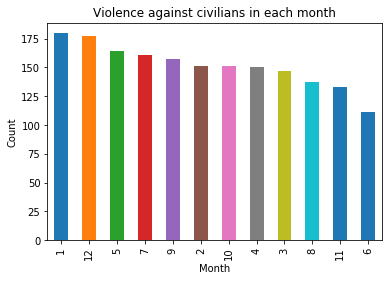

In [140]:
Violence_against_civilians_Incidents.Month.value_counts().plot.bar()
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Violence against civilians in each month")